<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

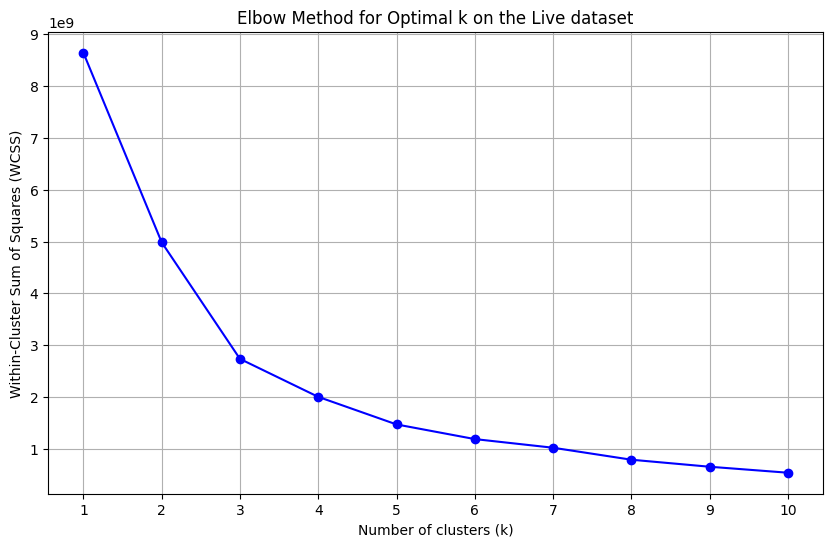

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/Live.csv")

df.info()
df.describe()

df = df.iloc[:, 3:12]

# ELBOW METHOD
# List to store WCSS (within-cluster sum of squares) for each k
wcss_live = []

# Calculate WCSS for k values from 1 to 10
for k in range(1, 11):
    kmeans_live = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_live.fit(df)
    wcss_live.append(kmeans_live.inertia_)

# Plotting the WCSS values for the Chapter 6 dataset to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_live, marker='o', color='b', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k on the Live dataset")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [2]:
df.isnull().sum()

,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0


      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  

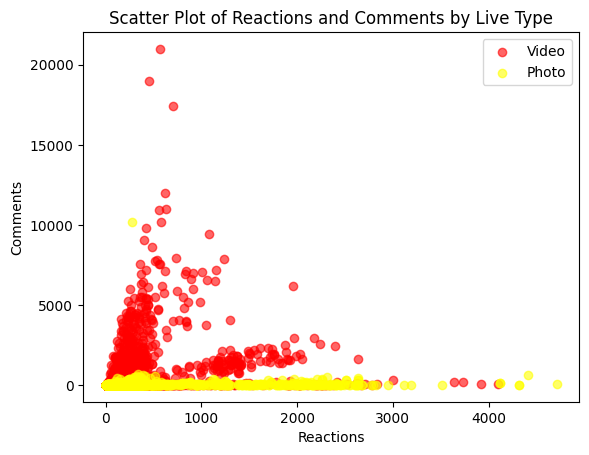

In [3]:
print(df)

df['status_type'] = pd.read_csv("/content/Live.csv")['status_type']

df['status_type'] = df['status_type'].replace({'video': 1, 'photo': 0})


video_type = df[df['status_type'] == 1]
photo_type = df[df['status_type'] == 0]


plt.scatter(video_type['num_reactions'], video_type['num_comments'], color='red', label='Video', alpha=0.6)
plt.scatter(photo_type['num_reactions'], photo_type['num_comments'], color='yellow', label='Photo', alpha=0.6)

plt.title('Scatter Plot of Reactions and Comments by Live Type')
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.legend()
plt.show()

MODELING

The K-means algorithm is an unsupervised clustering technique used to group data points into 𝑘 k clusters. In a dataset, K-means works by finding groups of data points that are closer to each other than they are to points in other groups.

In [4]:
columns_for_clustering = ['num_reactions', 'num_comments', 'num_shares']

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42,init="k-means++",n_init='auto')
df['Cluster'] = kmeans.fit_predict(df[columns_for_clustering])

# Count the number of observations per cluster
cluster_counts = df['Cluster'].value_counts()

# Print the result
print("Number of observations per cluster:")
print(cluster_counts)

# Get cluster centers
centroid_table = pd.DataFrame(kmeans.cluster_centers_, columns=columns_for_clustering)

# Print the centroid table
print("Centroid Table:")
print(centroid_table)


Number of observations per cluster:
Cluster
0    6242
2     412
3     336
1      60
Name: count, dtype: int64
Centroid Table:
   num_reactions  num_comments  num_shares
0     108.391283     63.055921   16.635635
1     615.500000   7383.450000  560.066667
2    1759.672330    100.575243   32.902913
3     545.818991   2088.231454  389.246291


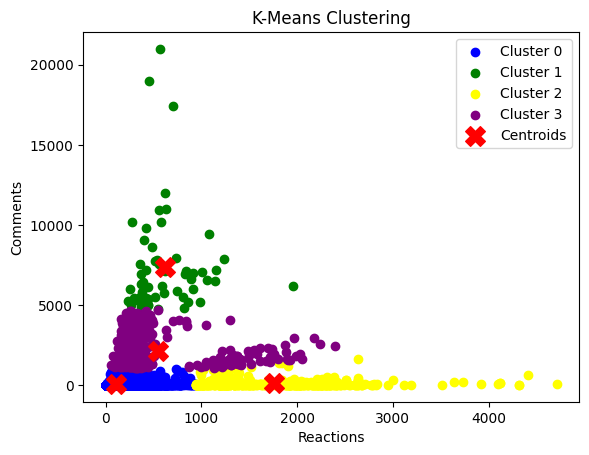

In [5]:
# Choose specific colors for each cluster
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'purple'}

# Scatter plot with custom colors
for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['num_reactions'], cluster_data['num_comments'], label=f'Cluster {cluster_label}', color=color)

# Plot centroids (only two columns)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

EVALUATION

Cluster 1 (60 observations) is the group of policy holders that is the ideal target for streamers aiming for the most comments engagements. Using the min and max values generated, this will be used to extract policy holder within the range similar to cluster 1.

In [6]:
print("Columns in DataFrame:", df.columns)
cluster_1 = df[df['Cluster']==1]

data = cluster_1[['num_reactions','num_comments','num_shares']]
# Calculate min, max, and mean values for each column
summary = pd.DataFrame({
    'Minimum': data.min(),
    'Maximum': data.max(),
    'Average': data.mean()
})

# Display the summary
print(summary)

Columns in DataFrame: Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type',
       'Cluster'],
      dtype='object')
               Minimum  Maximum      Average
num_reactions      236     1959   615.500000
num_comments      4741    20990  7383.450000
num_shares          25     1379   560.066667


REPRESENTATION

This scatter plot analyzes social media engagement by plotting reactions, comments, and shares against post index. It reveals patterns, such as whether more reactions lead to more comments or shares, and highlights posts with unusually high or low engagement. This can provide valuable insights into audience preferences and content performance.

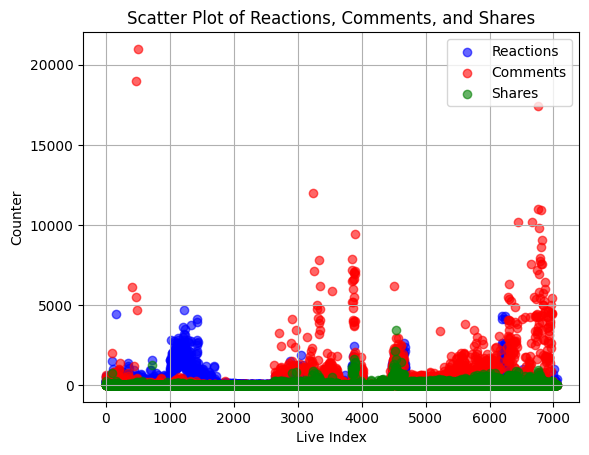

In [7]:
# Scatter plot for each data type with the index as the x-axis
plt.scatter(df.index, df['num_reactions'], color='blue', label='Reactions', alpha=0.6)
plt.scatter(df.index, df['num_comments'], color='red', label='Comments', alpha=0.6)
plt.scatter(df.index, df['num_shares'], color='green', label='Shares', alpha=0.6)

# Title, legend, and display settings
plt.title('Scatter Plot of Reactions, Comments, and Shares')
plt.xlabel('Live Index')
plt.ylabel('Counter')
plt.legend()
plt.grid(True)
plt.show()